# Random Shuffling

## Preliminaries: helper functions

Here we define a collection of functions that will be useful for the rest of the notebook. You'll need to run this cell to get started.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import random
import numpy as np
import math

## Random Shuffling

### `random_sort_shuffle`

The `random_sort_shuffle` function should follow the idea of using a random comparator for sorting the array `a`. 

In [2]:
from functools import cmp_to_key

def comparator(a, b):
    return random.randint(-1, 1)

def random_sort_shuffle(a):
    a.sort(key=cmp_to_key(comparator))

### Another shuffling algorithm based on sorting, but uniform

In [3]:
# Permute by sorting: Assign a random priority from 1 to n^3 to every element
# Cormen page 125
def random_sort_shuffle_uniform(a):
    n = len(a)
    a.sort(key=lambda _: random.randint(1, n ** 3))

### `fisher_yates_shuffle`

In [4]:
def swap(a, i, j):
    a[i], a[j] = a[j], a[i]
    
def fisher_yates_shuffle(a):
    n = len(a)
    for i in range(n - 1):
        j = random.randint(i, n - 1)  
        swap(a, i, j)

### Buggy `fisher_yates_shuffle`

In [5]:
# Choose the element to swap from a subarray not containing the current index 
# Iterate forward
# Permute-Without-Identity from Cormen
def fisher_yates_shuffle_buggy1(a):
    n = len(a)
    for i in range(n - 1):     
        j = random.randint(i + 1, n - 1)  # the (1, i - 1) error in the slides
        swap(a, i, j)
        
# Choose the element to swap from the whole array at every iteration. 
# Iterate forward up to penultimate element 
def fisher_yates_shuffle_buggy2(a):
    n = len(a)
    for i in range(n - 1):
        j = random.randint(0, n - 1)    # the (0, n) error in the slides
        swap(a, i, j)

### Other buggy implementations

In [6]:
# Choose the element to swap from the whole array at every iteration 
# Iterate forward
# Permute-With-All from Cormen 
def permute_with_all(a):
    n = len(a)
    for i in range(n):
        j = random.randint(0, n - 1)    
        swap(a, i, j)
        
# Choose a random offset and then shift the array with that offset      
# Permute-By-Cyclic from Cormen
def permute_by_cyclic(a):
    n = len(a)
    offset = random.randint(0, n - 1)
    b = a[-offset:] + a[:-offset]
    
    # Only way to actually change the values in a also outside this function
    for i in range(n):
        a[i] = b[i]

### Empirical analysis

In [7]:
# Returns the swap matrix generated by running the 
# shuffle_function on [0, 1, 2, ..., n_of_elems] 'times' times 
# Column: index before shuffling
# Row: Index after shuffling
def swap_matrix(shuffle_function, n_of_elems, times):
    matrix = np.zeros((n_of_elems, n_of_elems), dtype=np.int)

    for _ in range(times):
        l_copy = [x for x in range(0, n_of_elems)]
        shuffle_function(l_copy)

        # Keep track of how many times index j is at position i
        for i in range(n_of_elems):
            matrix[l_copy[i]][i] += 1
    
    return matrix

In [8]:
def plot_matrixes(matrixes):
    columns = len(matrixes)
    rows = 1
    fig, axs = plt.subplots(rows, columns, figsize=(15, 10))
    
    for j in range(columns):
        axs[j].imshow(eval(matrixes[j]))
        axs[j].set_title(matrixes[j])
                
    plt.show()

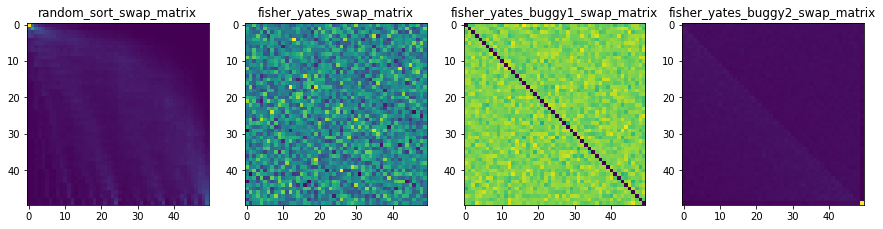

In [9]:
times = 10000
n_of_elems = 50

random_sort_swap_matrix = swap_matrix(random_sort_shuffle, n_of_elems, times)      

fisher_yates_swap_matrix = swap_matrix(fisher_yates_shuffle, n_of_elems, times)

fisher_yates_buggy1_swap_matrix = swap_matrix(fisher_yates_shuffle_buggy1, n_of_elems, times)

fisher_yates_buggy2_swap_matrix = swap_matrix(fisher_yates_shuffle_buggy2, n_of_elems, times)

matrixes = [
            'random_sort_swap_matrix',
            'fisher_yates_swap_matrix',
            'fisher_yates_buggy1_swap_matrix',
            'fisher_yates_buggy2_swap_matrix',
           ]

plot_matrixes(matrixes)

From the charts above, we can see that the Fisher Yates Shuffle is the best shuffling algorithm: it produces uniformly random permutations.

Then we have several not uniform algorithms:

 - Fisher Yates Buggy 1: We can see that is generally uniform, apart from the diagonal. This is because an element initially in position i never ends up in position i after the swap.

 - Random Sort Shuffling: The chart looks extremely dark, but we can spot a very bright point that corresponds to the position (0, 0), and in general elements close to the diagonal are lighter than elements further away. This is because, for an element in order to be swapped many times, it needs to get the same result from the random comparator again and again, which is unlikely.

 - Fisher Yates Buggy 2: Again this chart is quite difficult to read since it's almost completely dark blue, but we can spot a very bright element in position (n, n), meaning that the last element rarely changes its position. This is because the loop doesn't include this element, and therefore it can be swapped only if another element gets its index from the random generator, whereas other elements gets quite likely swapped also when it's their turn in the loop. Since that last element has such a high frequence of appearence in the last position, others values, even if close between them, all appear blue being so small comparared to that frequence.

### Additional Algorithms

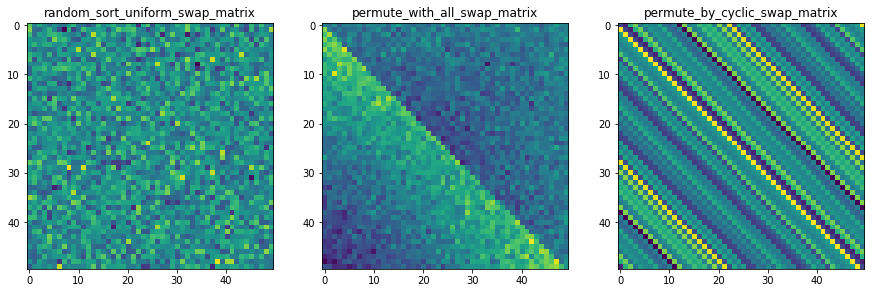

In [10]:
random_sort_uniform_swap_matrix = swap_matrix(random_sort_shuffle_uniform, n_of_elems, times)      

permute_with_all_swap_matrix = swap_matrix(permute_with_all, n_of_elems, times)

permute_by_cyclic_swap_matrix = swap_matrix(permute_by_cyclic, n_of_elems, times)

additional_matrixes = [
            'random_sort_uniform_swap_matrix',
            'permute_with_all_swap_matrix',
            'permute_by_cyclic_swap_matrix',
           ]

plot_matrixes(additional_matrixes)

Random Sort Uniform, which assign every element a priority between 1 and $\frac{1}{n^3}$, produces uniformly random permutations, assuming the elements have distinct priorities. Since the probability that all the elements have distinct priorities is very high in this case, we can see from the chart how this algorithm produces a result similar to Fisher Yates algorithm. 
However, while Random Sort Uniform runs in $\\{O}(n^2)$, Fisher Yates runs in only $\\{O}(n)$. On the other hand, an advantage of the former is that it has a simple parallel implementation, unlike Fisher Yates, which is sequential.

Permute_With_All has a more subtle bug compared to the other buggy implementations. The swap matrix suggests that is not uniform. The reason for this is that this algorithm can create $n^n$ sequences of swaps (n possible swaps for every index). But we know that we have only $n!$ permutations, and $n!$ doesn't divide $n^n$ evenly. Therefore, since every sequence of swaps will result in some permutation, this means that some permutations are more likely than others.

Permute_by_cyclic looks like it has similar colors to Fisher Yates, but it follows a very clear pattern: elements in a diagonal always have the same color. That is because the algorithm is actually only shifting the array. This means that even if every element has a $\frac{1}{n}$ probability of ending up in each position, only $n$ permutations out of the $n!$ possible can actually be generated.
 